# Exploring TF-IDF scores in enhanced_vault_index

## Outline

1) Exploring enhanced_vault_index.json using TD-IDF Scores

### 3. Exploring enhanced_vault_index.json using TD-IDF Scores

#### Loading the enhanced vault_index.json

In [5]:
import json
import numpy as np
import pandas as pd

In [ ]:
# === STEP 1: Load the enhanced vault_index.json ===
with open("Data/enhanced_vault_index.json", "r", encoding="utf-8") as f:
    vault_index = json.load(f)

In [24]:
# === STEP 2: Convert TF-IDF Scores into a Feature Matrix ===
# Create a list of document keys (for labeling purposes)
keys = list(vault_index.keys())

# Create a matrix where each row is a document and each column is a term's score
# We'll use a dictionary to keep track of all unique terms in the entire corpus
all_terms = set()

# Collect all unique terms from the TFIDF_Score of all documents
for doc in vault_index.values():
    all_terms.update(doc['TFIDF_Score'].keys())

# Create a mapping of terms to index in the feature matrix
term_to_index = {term: idx for idx, term in enumerate(all_terms)}

# Now, create the feature matrix
num_documents = len(vault_index)
num_terms = len(all_terms)
X = np.zeros((num_documents, num_terms))

# Populate the feature matrix with TF-IDF scores
for i, doc in enumerate(vault_index.values()):
    for term, score in doc['TFIDF_Score'].items():
        term_idx = term_to_index[term]
        X[i, term_idx] = score
        # print(term, score)

# get the value of a specific term for a specific document

In [25]:
# #TEST: # Additionally, print a portion of the feature matrix to ensure it's populated
# # list(all_terms)[0] = 'exceptionally
# # === STEP 3: Verify if X is not full of zeros ===
# # Check if 'exceptionally' is in the term set
# if 'exceptionally' in term_to_index:
#     term_idx = term_to_index['exceptionally']
#     # Print the values for the specific term across all documents
#     print("Values for 'exceptionally' across documents:")
#     print(X[:, term_idx])  # All documents' scores for the term 'exceptionally'
# else:
#     print("Term 'exceptionally' not found in the vocabulary.")

# # Additionally, print a portion of the feature matrix to ensure it's populated
# # print("\nSample of feature matrix X:")
# # print(X[:5, :10])  # Display first 5 documents and first 10 terms

In [26]:
# get X as a dataframe
# Print the size of X
print("Size of X (documents, terms):", X.shape)
df = pd.DataFrame(X, columns=list(term_to_index.keys()))
df.head()

Size of X (documents, terms): (796, 2880)


,statistic,explicitly,carlo,model,s,porterstemmer,find,computer,split,correctly,...,larger,subset,20250329081752,airplane,concurrency,joining,discussion,synchronization,quadratic,reducing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.173171,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [31]:
# get the documents that have a non-zero value for a specific feature
non_zero_dict = {
    feature: df.index[df[feature] != 0].tolist()
    for feature in all_terms}

#### Searching for documents that have non zero values TF-IFD scores

In [45]:
# The following models the search 
# for specific values within Obsidian/the Data Archive. It does not pick up all terms
# just the notes where these are the TF-IDF highest scores.

investigation_l = ['covariance', 'agent','partition']

for term in investigation_l:
    indices = non_zero_dict.get(term, [])
    if indices:
        titles_temp = [vault_index[keys[i]]['title'] for i in indices]
        print(f"{term:<25} → {len(titles_temp)} docs")
        for t in titles_temp:
            print(f"  - {t}")
    else:
        print(f"{term:<25} → [No non-zero occurrence]")


covariance                → 7 docs
  - Covariance Structures
  - Covariance vs Correlation
  - Covariance
  - Gaussian Mixture Models
  - Gaussian Model
  - Gaussian_Mixture_Model_Implementation.py
  - Kmeans vs GMM
agent                     → 9 docs
  - Agent-Based Modelling
  - Agentic Solutions
  - Deep Q-Learning
  - Energy ABM
  - Energy
  - Langchain
  - Policy
  - Reinforcement learning
  - What can ABM solve within the energy sector
partition                 → 3 docs
  - Apache Kafka
  - K-means
  - SQL Window functions


#### Cosine Similarity and Hierarchical Clustering

This groups similar documents using Cosine Similarity and Hierarchical Clustering. The goal is to visualize the relationships between documents and determine the optimal number of clusters. The script performs the following tasks:

Cosine Similarity is computed between documents to understand their pairwise similarities.

Hierarchical Clustering is applied to the similarity matrix to create a dendrogram, which helps visualize how documents are clustered.

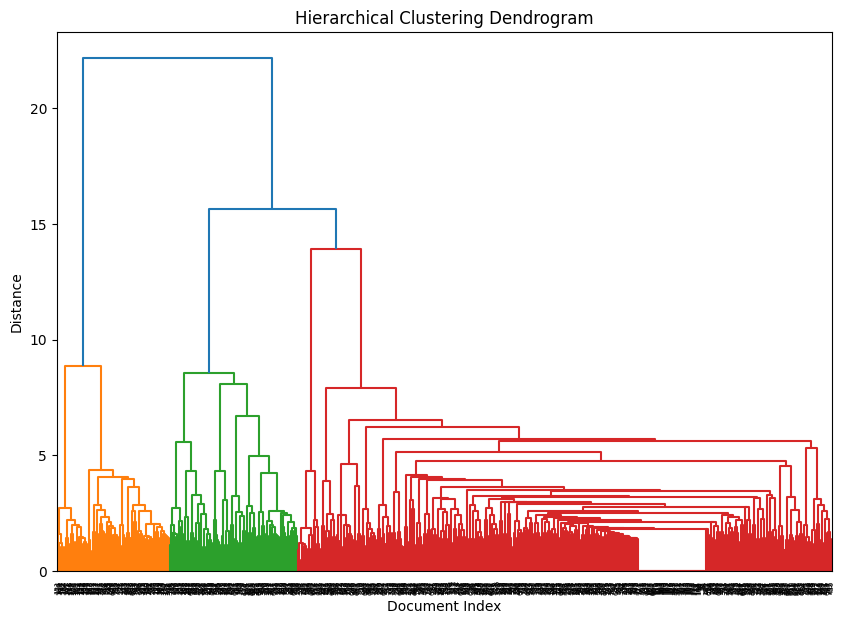

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Step 1: Compute the Cosine Similarity Matrix
similarity_matrix = cosine_similarity(X)

# Step 2: Perform Hierarchical Clustering on the Cosine Similarity Matrix
linkage_matrix = sch.linkage(similarity_matrix, method='ward')

# Step 3: Visualize the Clusters using a Dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Document Index")
plt.ylabel("Distance")
plt.show()


Using the hierarchical clustering dendrogram. After visually inspecting the dendrogram, we set a threshold distance to cut the tree and determine the number of clusters. The fcluster function is used to assign documents to clusters based on the threshold distance.

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Step 1: Define the maximum distance for cutting the tree (threshold value).
# This threshold will determine the number of clusters by cutting the tree at the specified height.
max_distance =2  # Adjust this value based on your dendrogram

# Step 2: Use fcluster to assign documents to clusters based on the linkage matrix and threshold
clusters = fcluster(linkage_matrix, max_distance, criterion='distance')

# Step 3: Print the number of unique clusters and their assignments
print(f"Number of clusters: {len(set(clusters))}")
# Optionally, you can print the cluster assignment for each document.
# print("Cluster assignments:", clusters)

Number of clusters: 147


In [ ]:
# Step 4: Define a function to get documents in a specific cluster
def get_docs_for_cluster(cluster_num, vault_index, clusters):
    # Find the indices of documents in the specified cluster
    cluster_indices = [i for i, cluster in enumerate(clusters) if cluster == cluster_num]
    
    # Get the corresponding documents using the indices from the vault_index
    # docs_in_cluster = [vault_index[i]['title'] for i in cluster_indices]


    vault_index_l = list(vault_index.keys())
    docs_in_cluster = [vault_index[vault_index_l[i]]['title'] for i in cluster_indices]
    docs_in_cluster_id= [vault_index_l[i] for i in cluster_indices]

    return docs_in_cluster,docs_in_cluster_id

# Example: Get documents for cluster number 10
cluster_num = 10
docs_for_cluster,docs_in_cluster_id = get_docs_for_cluster(cluster_num, vault_index, clusters)

# Step 5: Print the documents in the cluster
print(f"Documents in Cluster {cluster_num}:")
for doc in docs_for_cluster:
    print(doc)

# Initialize a set to hold all unique TFIDF_Score keys
tfidf_keys = set()

# Iterate through each document id in docs_in_cluster_id
for i in docs_in_cluster_id:
    # Check if the 'TFIDF_Score' key exists in the document's data
    if 'TFIDF_Score' in vault_index[i]:
        # Update the set with keys from the TFIDF_Score for this document
        tfidf_keys.update(vault_index[i]['TFIDF_Score'].keys())
    else:
        # If TFIDF_Score is not found, no need to update (no action needed)
        continue

# Print the unique TFIDF_Score keys
print("\n Most important words in these documents:")
for i in tfidf_keys:
    print(i)

Documents in Cluster 10:
Anomaly Detection with Statistical Methods
Boxplot
Documentation & Meetings
Fuzzywuzzy
Hash
K-nearest neighbours
Parquet
Scala
shapefile
unittest
Variance

 Most important words in these documents:
knn
boxplot
unittest
deviation
size
normal
geometry
patch
project
framework
matplotlib
histogram
fetch_data
hash
park
attribute
shapefile
return
row
file
distance
shapefiles
panda
__main__
pager
read
type
concise
used
password
return_value
columnar
show
variance
sha
neighbor
indicates
mu_x
spelling
produce
much
proposal
non
new
outlier
excluding
classifies
java
average
gi
scala
detection
functional
nearest
title
median
256
mock
session
input
parametric
note
parquet
code
meeting
plt
spatial
programming
density
storage
mocked
fixed
cleansing
tool
template
hello
review
data
spread
test
mean
quartile
point
correcting
format
bin
big
measure
column
technical
geospatial


In [ ]:
import pandas as pd
from collections import Counter

# Step 1: Use Counter to count the number of documents in each cluster
cluster_counts = Counter(clusters)

# Step 2: Find the maximum number of documents in a single cluster
max_cluster_size = max(cluster_counts.values())
print(max_cluster_size)

# Step 2: Create an empty DataFrame with rows as cluster numbers and columns as 'doc_1', 'doc_2', ...
columns = [f"doc_{i+1}" for i in range(max_cluster_size)]
df_clusters = pd.DataFrame(columns=columns)

# Step 3: Populate the DataFrame
for cluster_num in set(clusters):
    # Get the indices of documents in this cluster
    cluster_indices = [i for i, cluster in enumerate(clusters) if cluster == cluster_num]
    
    # Get the corresponding document titles from vault_index
    # doc_titles = [vault_index[i]['title'] for i in cluster_indices]
    doc_titles = [vault_index[vault_index_l[i]]['title'] for i in cluster_indices]

    
    # Create a row for this cluster and fill with document titles
    row = doc_titles + [None] * (max_cluster_size - len(doc_titles))  # Fill missing with None (or NaN)
    
    # Add the row to the DataFrame
    df_clusters.loc[cluster_num] = row

# Step 4: Print the DataFrame
df_clusters.head()

# Step 4: Print the DataFrame where doc_133 is not None
df_filtered = df_clusters[df_clusters['doc_133'].notna()]
df_filtered.head()

#### Vector Embedding Clustering

Generates vector embeddings for a list of words using spaCy

Clusters the vectors using KMeans

Reduces dimensions with t-SNE for visualization

Plots the result using seaborn and matplotlib

In [ ]:
# word_embedding_clustering.py

# --- Imports ---
import spacy
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load Words ---
words = list(all_terms)

# --- Step 2: Load spaCy Language Model ---
# Use 'en_core_web_md' or 'en_core_web_lg' (install with: python -m spacy download en_core_web_md)
nlp = spacy.load("en_core_web_md")

# --- Step 3: Generate Word Embeddings ---
embeddings = []
valid_words = []

for word in words:
    token = nlp(word)[0]
    if token.has_vector:  # skip words without embeddings
        embeddings.append(token.vector)
        valid_words.append(word)

print(f"Kept {len(valid_words)} valid words with vectors.")


Kept 2453 valid words with vectors.


In [57]:
# from sklearn.cluster import KMeans
# from kneed import KneeLocator
# import matplotlib.pyplot as plt

# # --- Step 4: Determine Optimal Number of Clusters using Elbow Method ---
# inertia = []
# cluster_range = range(1, 21)

# for k in cluster_range:
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
#     kmeans.fit(embeddings)
#     inertia.append(kmeans.inertia_)

# # --- Detect Elbow Point ---
# knee = KneeLocator(cluster_range, inertia, curve="convex", direction="decreasing")
# optimal_k = knee.elbow

# print(f"Optimal number of clusters determined: {optimal_k}")

# # --- Plot the Elbow Curve ---
# plt.figure(figsize=(8, 4))
# plt.plot(cluster_range, inertia, marker='o')
# plt.axvline(x=optimal_k, color='r', linestyle='--', label=f"Optimal k = {optimal_k}")
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Inertia")
# plt.title("Elbow Method with Detected Optimal k")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # --- Step 5: Run KMeans with Optimal k ---
# kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
# labels = kmeans.fit_predict(embeddings)

In [58]:
# --- Step 4: Clustering with KMeans ---
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

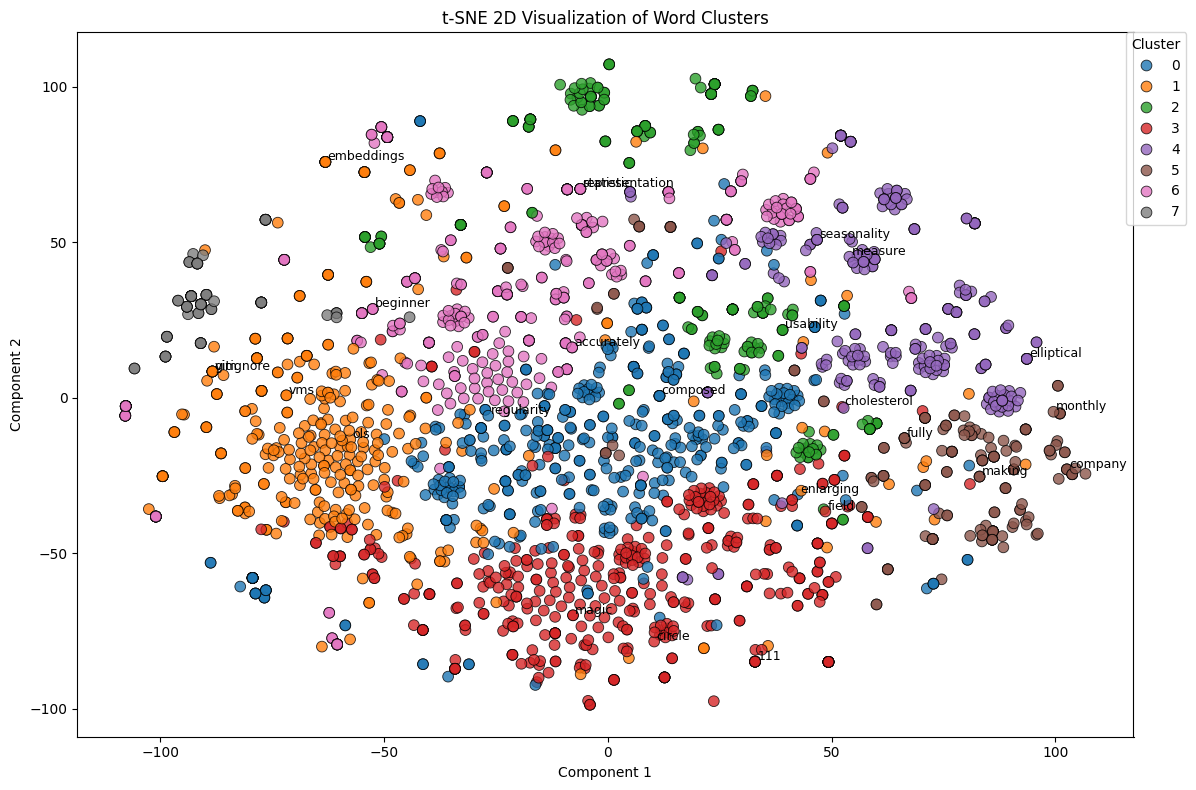

In [ ]:
import numpy as np
embeddings = np.array(embeddings)

# --- Step 5: Dimensionality Reduction with t-SNE ---
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(embeddings)

# --- Step 6: Plotting the Result ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=embeddings_2d[:, 0], y=embeddings_2d[:, 1],
    hue=labels, palette='tab10', s=60, alpha=0.8, edgecolor='k'
)

# Annotate some of the words to avoid clutter
for i, word in enumerate(valid_words):
    if i % 100 == 0 or len(valid_words) < 100:  # show some labels if small set
        plt.text(embeddings_2d[i, 0]+0.5, embeddings_2d[i, 1]+0.5, word, fontsize=9)

plt.title("t-SNE 2D Visualization of Word Clusters")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Cluster", loc="best", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()


#### Vector Search (also see FAISS)

In [83]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# --- Step: Convert embeddings to array for vector math ---
embeddings_array = np.array(embeddings)

# --- Step: Get embedding for target word ---
target_word = "question"

target_token = nlp(target_word)

if not target_token.has_vector:
    raise ValueError(f"'{target_word}' does not have a vector representation.")

target_vector = target_token.vector.reshape(1, -1)

# --- Step: Compute cosine similarities ---
similarities = cosine_similarity(target_vector, embeddings_array)[0]

# --- Step: Get top-N most similar words ---
top_n = 20
top_indices = similarities.argsort()[::-1][1:top_n + 1]  # [1:] to skip 'company' itself if present

print(f"Top {top_n} words similar to '{target_word}':")
for idx in top_indices:
    print(f"{valid_words[idx]:<15} (similarity: {similarities[idx]:.4f})")


Top 20 words similar to 'question':
ask             (similarity: 1.0000)
question        (similarity: 1.0000)
write           (similarity: 1.0000)
understanding   (similarity: 0.6080)
paragraph       (similarity: 0.6080)
discussion      (similarity: 0.6080)
phrase          (similarity: 0.6080)
note            (similarity: 0.6080)
general         (similarity: 0.6080)
clear           (similarity: 0.6080)
detail          (similarity: 0.6080)
interpretation  (similarity: 0.6080)
summarize       (similarity: 0.6080)
partial         (similarity: 0.6080)
confirmation    (similarity: 0.6080)
meaning         (similarity: 0.6080)
theory          (similarity: 0.6080)
logical         (similarity: 0.6080)
logic           (similarity: 0.6080)
evidence        (similarity: 0.6080)


In [87]:
x=target_word
if x in all_terms:
    print(f"{x} is in all_terms")
else:
    print(f"{x} is not in all_terms")
vault_index_l = list(vault_index.keys())
l_index = df[df[x] != 0].index
matching_docs = [vault_index[vault_index_l[i]]['title'] for i in l_index]
matching_docs

question is in all_terms


['Mixture of Experts',
 'Pandas Dataframe Agent',
 'Problem Definition',
 'Scientific Method']

#### Outliers

In [ ]:
# Goal: Identify documents that are significantly different from the rest.
# Using the TF-IDF scores 

from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination=0.1)
outliers = isolation_forest.fit_predict(X)

# print("Outlier labels: ", outliers)

# get docs of X that are outliers
# outliers
titles=list(vault_index.keys())
outlier_docs = [titles[i] for i in range(len(outliers)) if outliers[i] == -1]
print("Number of outlier docs: ", len(outlier_docs))

Number of outlier docs:  80


In [ ]:
for doc in outlier_docs:
    print(vault_index[doc]['title'])

#### Querying

In [48]:
# 7. Document Ranking / Search Engine
# Goal: Rank documents based on relevance to a query.
# Technique: Use the cosine similarity between a query and documents to rank them, or compute a relevance score using TF-IDF.
from sklearn.metrics.pairwise import cosine_similarity

def search_documents(query, X, vault_index, term_to_index,titles):
    # Preprocess the query in the same way as documents
    query_vector = np.zeros(X.shape[1])
    for word in query.split():
        if word in term_to_index:
            query_vector[term_to_index[word]] = 1  # Set to 1 or use actual TF-IDF if needed

    # Compute cosine similarity
    similarity = cosine_similarity([query_vector], X)

    # Sort by similarity
    sorted_indices = similarity.argsort()[0][::-1]
    for idx in sorted_indices[:5]:
        print(f"Document: {vault_index[titles[idx]]['title']}, Similarity: {similarity[0][idx]}")

query="querying"
search_documents(query, X, vault_index, term_to_index,titles)


Document: Querying, Similarity: 0.5964916321941033
Document: SQL, Similarity: 0.2635833131269496
Document: Data Warehouse, Similarity: 0.21493648689430742
Document: Query Optimisation, Similarity: 0.2136463217748205
Document: Microsoft Access, Similarity: 0.21182979292629442


#### Word cloud

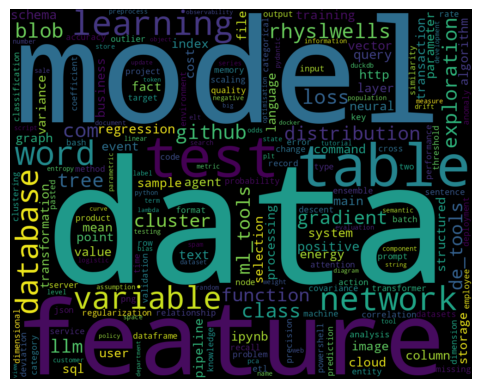

In [ ]:
# 5. Word Cloud / Term Frequency Visualization
# Goal: Visualize the most common terms across all documents.
# Technique: Create a word cloud from the TF-IDF scores to highlight important terms.

from wordcloud import WordCloud

# Aggregate all the TF-IDF scores
all_scores = {}
for doc in vault_index.values():
    for term, score in doc["TFIDF_Score"].items():
        all_scores[term] = all_scores.get(term, 0) + score

wordcloud = WordCloud(width=1000, height=800).generate_from_frequencies(all_scores)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()